In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# Pobranie listy wszystkich plików z folderu 'Sales_Data'
files = glob.glob('Sales_Data/*')

In [3]:
# Wczytanie danych z pierwszego pliku do DataFrame
df = pd.read_csv(files[0])

# Iteracja przez pozostałe pliki i łączenie ich z głównym DataFrame
for file in files[1:]:
    # Wczytywanie danych z bieżącego pliku do tymczasowego DataFrame
    df_temp = pd.read_csv(file)
    # Łączenie tymczasowego DataFrame z głównym DataFrame
    df = pd.concat([df, df_temp], ignore_index=True)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
# Konwersja kolumny 'Quantity Ordered' na typ numeryczny, z zamianą błędnych wartości na NaN
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
# Konwersja kolumny 'Price Each' na typ numeryczny, z zamianą błędnych wartości na NaN
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
# Konwersja kolumny 'Order Date' na typ daty, z zamianą błędnych wartości na NaN
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [7]:
# Zliczenie liczby brakujących wartości w każdej kolumnie DataFrame
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [8]:
# Usunięcie wszystkich wierszy zawierających brakujące wartości z DataFrame
df.dropna(inplace=True)

In [9]:
# Zliczenie liczby zduplikowanych wierszy w DataFrame
df.duplicated().sum()

264

In [10]:
# Usunięcie wszystkich zduplikowanych wierszy z DataFrame
df.drop_duplicates(inplace=True)

In [11]:
# Zresetowanie indeksów DataFrame, usuwając poprzednie indeksy
df.reset_index(drop=True, inplace=True)

In [12]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [13]:
# Zapisanie DataFrame do pliku CSV
df.to_csv('Sales.csv', index=False)

In [14]:
# Obliczenie wartości zamówienia poprzez pomnożenie ilości zamówionych produktów przez ich cenę
df['Order Value'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
# Wyodrębnienie adresu z kolumny 'Purchase Address' poprzez podział ciągu znaków po przecinku
df['Adres'] = df['Purchase Address'].apply(lambda x: x.split(', ')[0])
# Wyodrębnienie miasta z kolumny 'Purchase Address' poprzez podział ciągu znaków po przecinku
df['City'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1])
# Wyodrębnienie stanu z kolumny 'Purchase Address' poprzez podział ciągu znaków po przecinku, a następnie po spacji
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[2].split(' ')[0])
# Wyodrębnienie kodu pocztowego z kolumny 'Purchase Address' poprzez podział ciągu znaków po przecinku, a następnie po spacji
df['Zip code'] = df['Purchase Address'].apply(lambda x: x.split(', ')[2].split(' ')[1])

In [16]:
# Wyodrębnienie roku z daty zamówienia
df['Year'] = df['Order Date'].dt.year
# Wyodrębnienie miesiąca z daty zamówienia
df['Month'] = df['Order Date'].dt.month
# Wyodrębnienie dnia miesiąca z daty zamówienia
df['Day'] = df['Order Date'].dt.day
# Wyodrębnienie godziny z daty zamówienia
df['Hour'] = df['Order Date'].dt.hour
# Wyodrębnienie minuty z daty zamówienia
df['Minute'] = df['Order Date'].dt.minute
# Wyodrębnienie nazwy dnia tygodnia z daty zamówienia
df['day_of_week'] = df['Order Date'].dt.day_name()

In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Value,Adres,City,State,Zip code,Year,Month,Day,Hour,Minute,day_of_week
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX,75001,2019,4,19,8,46,Friday
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA,02215,2019,4,7,22,30,Sunday
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA,90001,2019,4,12,14,38,Friday
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA,90001,2019,4,12,14,38,Friday
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA,90001,2019,4,30,9,27,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,840 Highland St,Los Angeles,CA,90001,2019,9,17,20,56,Tuesday
185682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,216 Dogwood St,San Francisco,CA,94016,2019,9,1,16,0,Sunday
185683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,220 12th St,San Francisco,CA,94016,2019,9,23,7,39,Monday
185684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,511 Forest St,San Francisco,CA,94016,2019,9,19,17,30,Thursday


In [18]:
# Grupowanie danych według produktów, sumowanie ilości zamówionych produktów dla każdego produktu
# oraz sortowanie wyników malejąco po ilości zamówionych produktów
df_Quantity = df.groupby('Product').sum().sort_values('Quantity Ordered', ascending=False)['Quantity Ordered'].reset_index()
df_Quantity

,Product,Quantity Ordered
0,AAA Batteries (4-pack),30986.0
1,AA Batteries (4-pack),27615.0
2,USB-C Charging Cable,23931.0
3,Lightning Charging Cable,23169.0
4,Wired Headphones,20524.0
5,Apple Airpods Headphones,15637.0
6,Bose SoundSport Headphones,13430.0
7,27in FHD Monitor,7541.0
8,iPhone,6847.0
9,27in 4K Gaming Monitor,6239.0


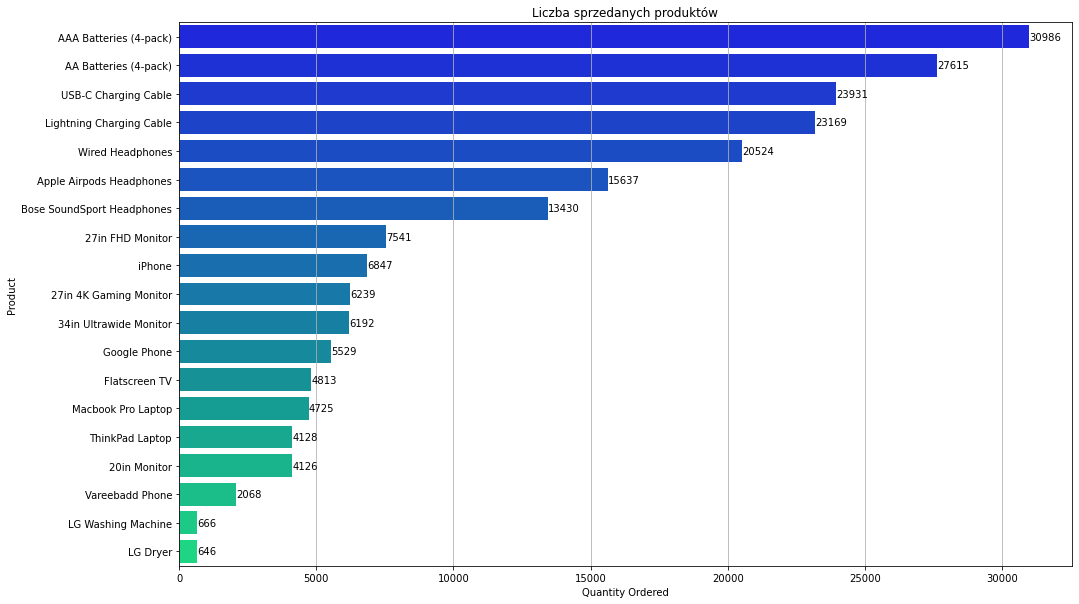

In [19]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_Quantity, y='Product', x='Quantity Ordered', palette='winter')
plt.grid(axis='x')
plt.title('Liczba sprzedanych produktów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [20]:
# Grupowanie danych według produktów, sumowanie wartości zamówień dla każdego produktu
# oraz sortowanie wyników malejąco po wartości zamówień
df_Value = df.groupby('Product').sum().sort_values('Order Value', ascending=False)['Order Value'].reset_index()
# Konwersja wartości zamówień na miliony dla lepszej czytelności
df_Value['Order Value (mln)'] = df_Value['Order Value'] / 10**6
df_Value

,Product,Order Value,Order Value (mln)
0,Macbook Pro Laptop,8032500.00,8.032500
1,iPhone,4792900.00,4.792900
2,ThinkPad Laptop,4127958.72,4.127959
3,Google Phone,3317400.00,3.317400
4,27in 4K Gaming Monitor,2433147.61,2.433148
5,34in Ultrawide Monitor,2352898.08,2.352898
6,Apple Airpods Headphones,2345550.00,2.345550
7,Flatscreen TV,1443900.00,1.443900
8,Bose SoundSport Headphones,1342865.70,1.342866
9,27in FHD Monitor,1131074.59,1.131075


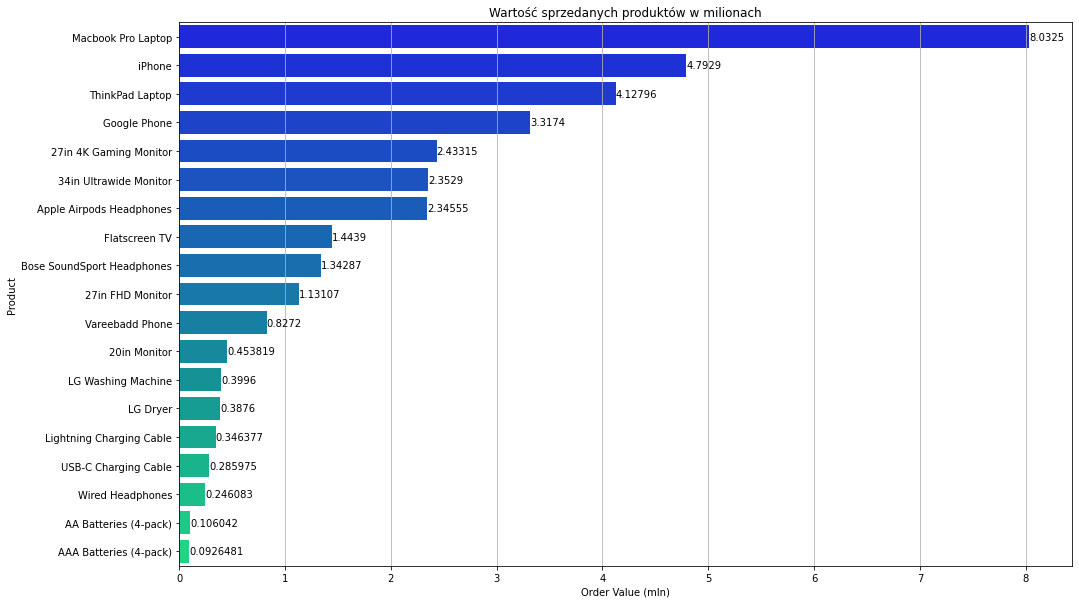

In [21]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_Value, y='Product', x='Order Value (mln)', palette='winter')
plt.grid(axis='x')
plt.title('Wartość sprzedanych produktów w milionach')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [22]:
# Grupowanie danych według stanów, sumowanie ilości zamówionych produktów dla każdego stanu
# oraz sortowanie wyników malejąco po ilości zamówionych produktów
df_State_Quantity = df.groupby('State').sum().sort_values('Quantity Ordered', ascending=False)['Quantity Ordered'].reset_index()
df_State_Quantity

,State,Quantity Ordered
0,CA,83416.0
1,NY,27903.0
2,TX,27844.0
3,MA,22494.0
4,GA,16584.0
5,WA,16534.0
6,OR,11291.0
7,ME,2746.0


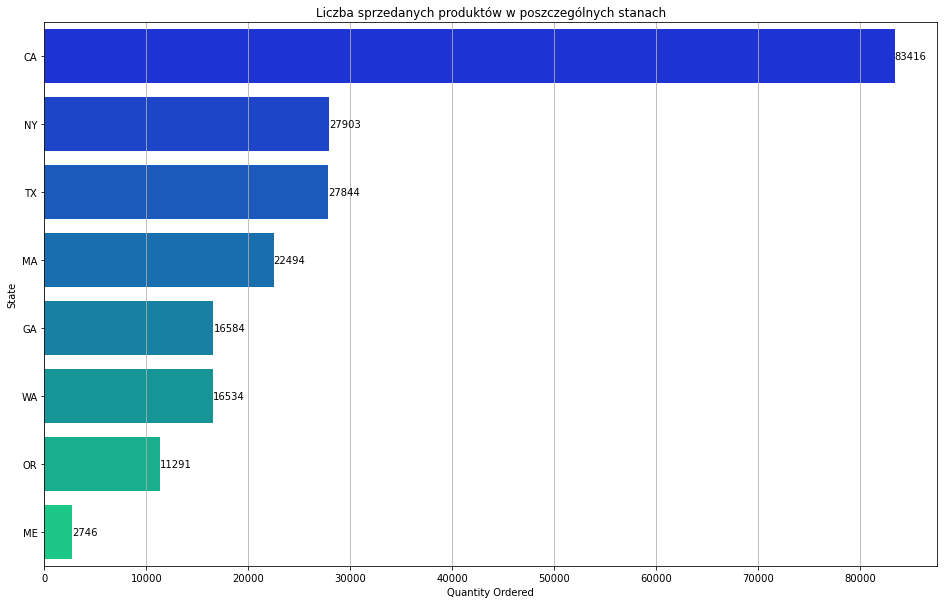

In [23]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_State_Quantity, y='State', x='Quantity Ordered', palette='winter')
plt.grid(axis='x')
plt.title('Liczba sprzedanych produktów w poszczególnych stanach')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [24]:
# Grupowanie danych według miast, sumowanie wartości zamówień dla każdego miasta
# oraz sortowanie wyników malejąco po wartości zamówień
df_City_Value = df.groupby('City').sum().sort_values('Order Value', ascending=False)['Order Value'].reset_index()
# Konwersja wartości zamówień na miliony dla lepszej czytelności
df_City_Value['Order Value (mln)'] = df_City_Value['Order Value'] / 10**6
df_City_Value

,City,Order Value,Order Value (mln)
0,San Francisco,8254743.55,8.254744
1,Los Angeles,5448304.28,5.448304
2,New York City,4661867.14,4.661867
3,Boston,3658627.65,3.658628
4,Atlanta,2794199.07,2.794199
5,Dallas,2765373.96,2.765374
6,Seattle,2745046.02,2.745046
7,Portland,2319331.94,2.319332
8,Austin,1818044.33,1.818044


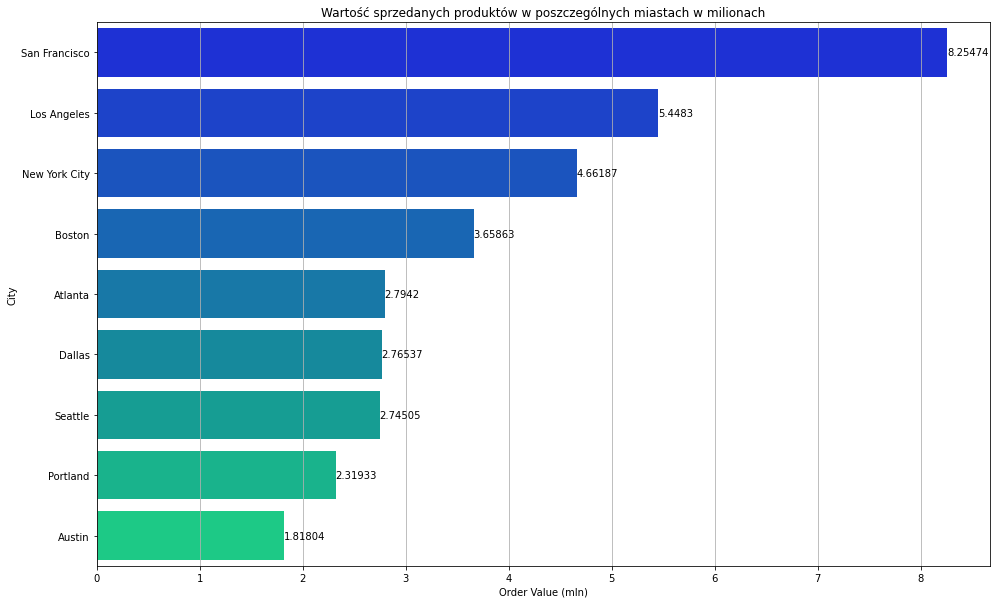

In [25]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_City_Value, y='City', x='Order Value (mln)', palette='winter')
plt.grid(axis='x')
plt.title('Wartość sprzedanych produktów w poszczególnych miastach w milionach')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [26]:
# Grupowanie danych według dnia tygodnia, zliczanie unikalnych numerów zamówień dla każdego dnia
df_Day_orders = df.groupby('day_of_week')['Order ID'].unique().apply(len).reset_index()
df_Day_orders.columns = ['day_of_week', 'Orders count']
# Określenie kolejności kategorii dni tygodnia
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_Day_orders['day_of_week'] = pd.Categorical(df_Day_orders['day_of_week'], categories=cats, ordered=True)
# Sortowanie DataFrame według dni tygodnia
df_Day_orders.sort_values(by='day_of_week', inplace=True)

df_Day_orders

,day_of_week,Orders count
1,Monday,25494
5,Tuesday,26063
6,Wednesday,25394
4,Thursday,25368
0,Friday,25216
2,Saturday,25420
3,Sunday,25482


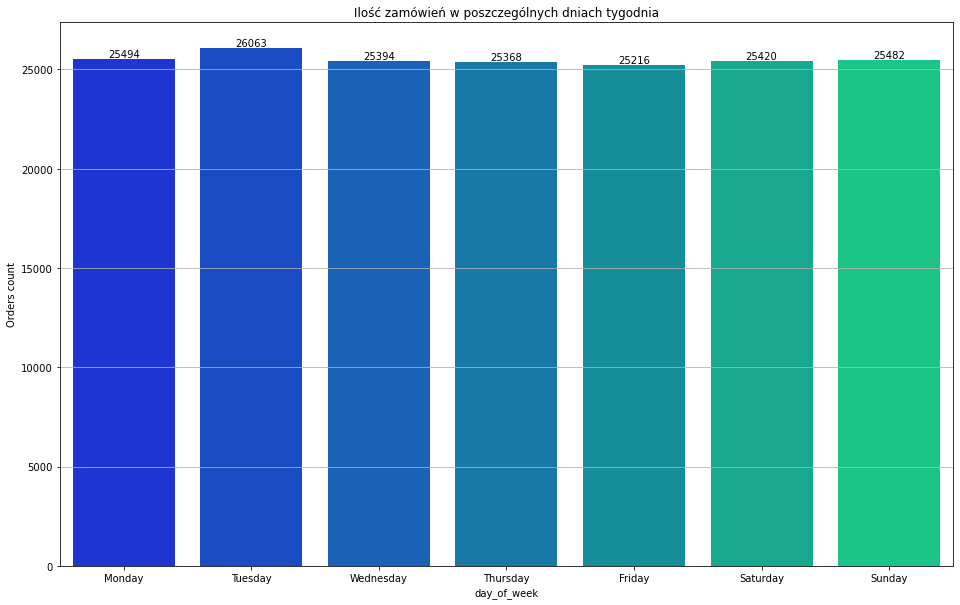

In [27]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_Day_orders, x='day_of_week', y='Orders count', palette='winter')
plt.grid(axis='y')
plt.title('Ilość zamówień w poszczególnych dniach tygodnia')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [28]:
# Grupowanie danych według miesiąca, zliczanie unikalnych numerów zamówień dla każdego miesiąca
df_Month_orders = df.groupby('Month')['Order ID'].unique().apply(len).reset_index()
df_Month_orders.columns = ['Month', 'Orders count']

df_Month_orders

,Month,Orders count
0,1,9293
1,2,11496
2,3,14549
3,4,17528
4,5,15836
5,6,12989
6,7,13761
7,8,11484
8,9,11202
9,10,19436


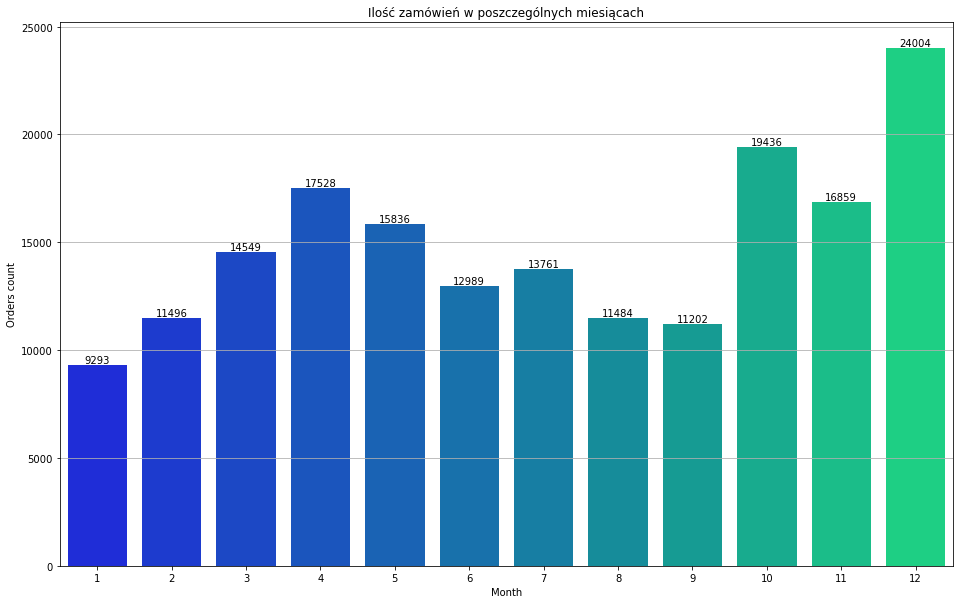

In [29]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_Month_orders, x='Month', y='Orders count', palette='winter')
plt.grid(axis='y')
plt.title('Ilość zamówień w poszczególnych miesiącach')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [30]:
# Grupowanie danych według godziny zamówienia, zliczanie unikalnych numerów zamówień dla każdej godziny
df_Hour_orders = df.groupby('Hour')['Order ID'].unique().apply(len).reset_index()
df_Hour_orders.columns = ['Hour', 'Orders count']

df_Hour_orders

,Hour,Orders count
0,0,3758
1,1,2255
2,2,1196
3,3,804
4,4,814
5,5,1259
6,6,2375
7,7,3836
8,8,6036
9,9,8404


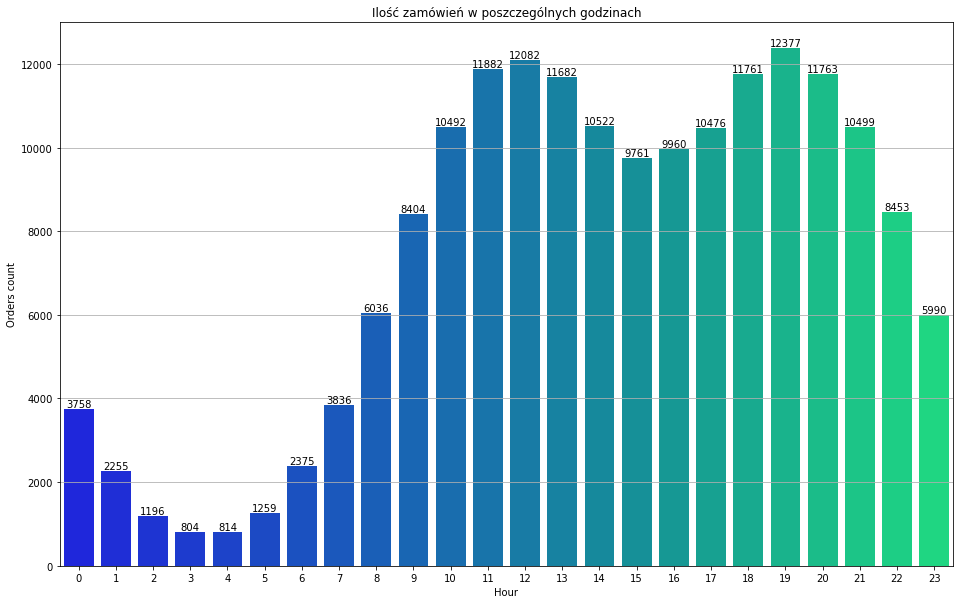

In [31]:
# Utworzenie wykresu słupkowego dla wcześniej pogrupowanych danych
plt.figure(figsize=(16,10))
ax = sns.barplot(data=df_Hour_orders, x='Hour', y='Orders count', palette='winter')
plt.grid(axis='y')
plt.title('Ilość zamówień w poszczególnych godzinach')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [34]:
# Zebranie do słownika produktów z zamówień o tym samym ID zamówienia
orders = {}
for index, row in df.iterrows():
    if row['Order ID'] in orders:
        orders[row['Order ID']].add(row['Product'])
    else:
        orders[row['Order ID']] = set()
        orders[row['Order ID']].add(row['Product'])

In [39]:
# zliczenie jak dużo zamówień było z poszczególną liczebnością różnych przedmiotów
c = {}
for v in orders.values():
    x = len(v)
    if x in c:
        c[x] += 1
    else:
        c[x] = 1

In [40]:
# liczba zamówień z daną liczbą różnych przedmiotów

In [41]:
c

{1: 171605, 2: 6479, 3: 337, 4: 15, 5: 1}

In [42]:
# zliczenie najczęściej kupowanych par przedmiotów
pairs = {}
for v in orders.values():
    x = len(v)
    if x > 1:
        y = list(v)
        for i in range(x):
            for j in range(i + 1, x):
                pair = ', '.join(sorted([y[i], y[j]]))
                if pair in pairs:
                    pairs[pair] += 1
                else:
                    pairs[pair] = 1

In [43]:
# najczęściej kupowane pary przedmiotów

In [44]:
dict(sorted(pairs.items(), key=lambda item: item[1], reverse=True))

{'Lightning Charging Cable, iPhone': 1011,
 'Google Phone, USB-C Charging Cable': 997,
 'Wired Headphones, iPhone': 462,
 'Google Phone, Wired Headphones': 422,
 'Apple Airpods Headphones, iPhone': 373,
 'USB-C Charging Cable, Vareebadd Phone': 368,
 'Bose SoundSport Headphones, Google Phone': 228,
 'USB-C Charging Cable, Wired Headphones': 203,
 'Vareebadd Phone, Wired Headphones': 149,
 'Lightning Charging Cable, Wired Headphones': 129,
 'Apple Airpods Headphones, Lightning Charging Cable': 116,
 'AA Batteries (4-pack), Lightning Charging Cable': 106,
 'Bose SoundSport Headphones, USB-C Charging Cable': 102,
 'Lightning Charging Cable, USB-C Charging Cable': 100,
 'Apple Airpods Headphones, Wired Headphones': 100,
 'AAA Batteries (4-pack), USB-C Charging Cable': 95,
 'AA Batteries (4-pack), AAA Batteries (4-pack)': 87,
 'AAA Batteries (4-pack), Wired Headphones': 86,
 'AA Batteries (4-pack), Wired Headphones': 83,
 'Bose SoundSport Headphones, Vareebadd Phone': 82,
 'AAA Batteries (4